                                   #Comprehensive Assessment : Deep Learning - 
                         Predicting Diabetes Progression using Artificial Neural Networks

                                 1. Loading and Preprocessing

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [48]:
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


In [3]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y


In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
df.shape

(442, 11)

In [8]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [9]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [10]:
# Check for missing values
print(df.isnull().sum())


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


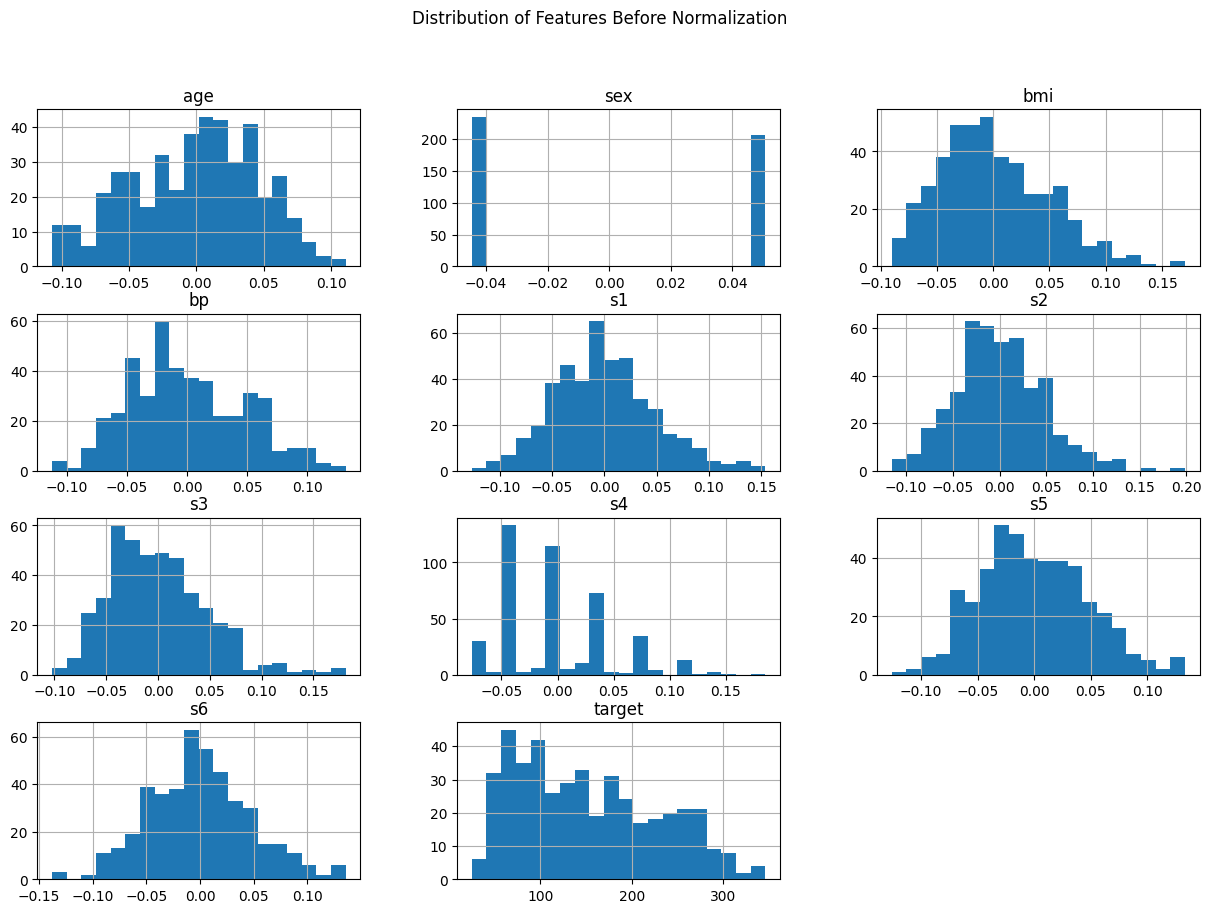

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Features Before Normalization')
plt.show()

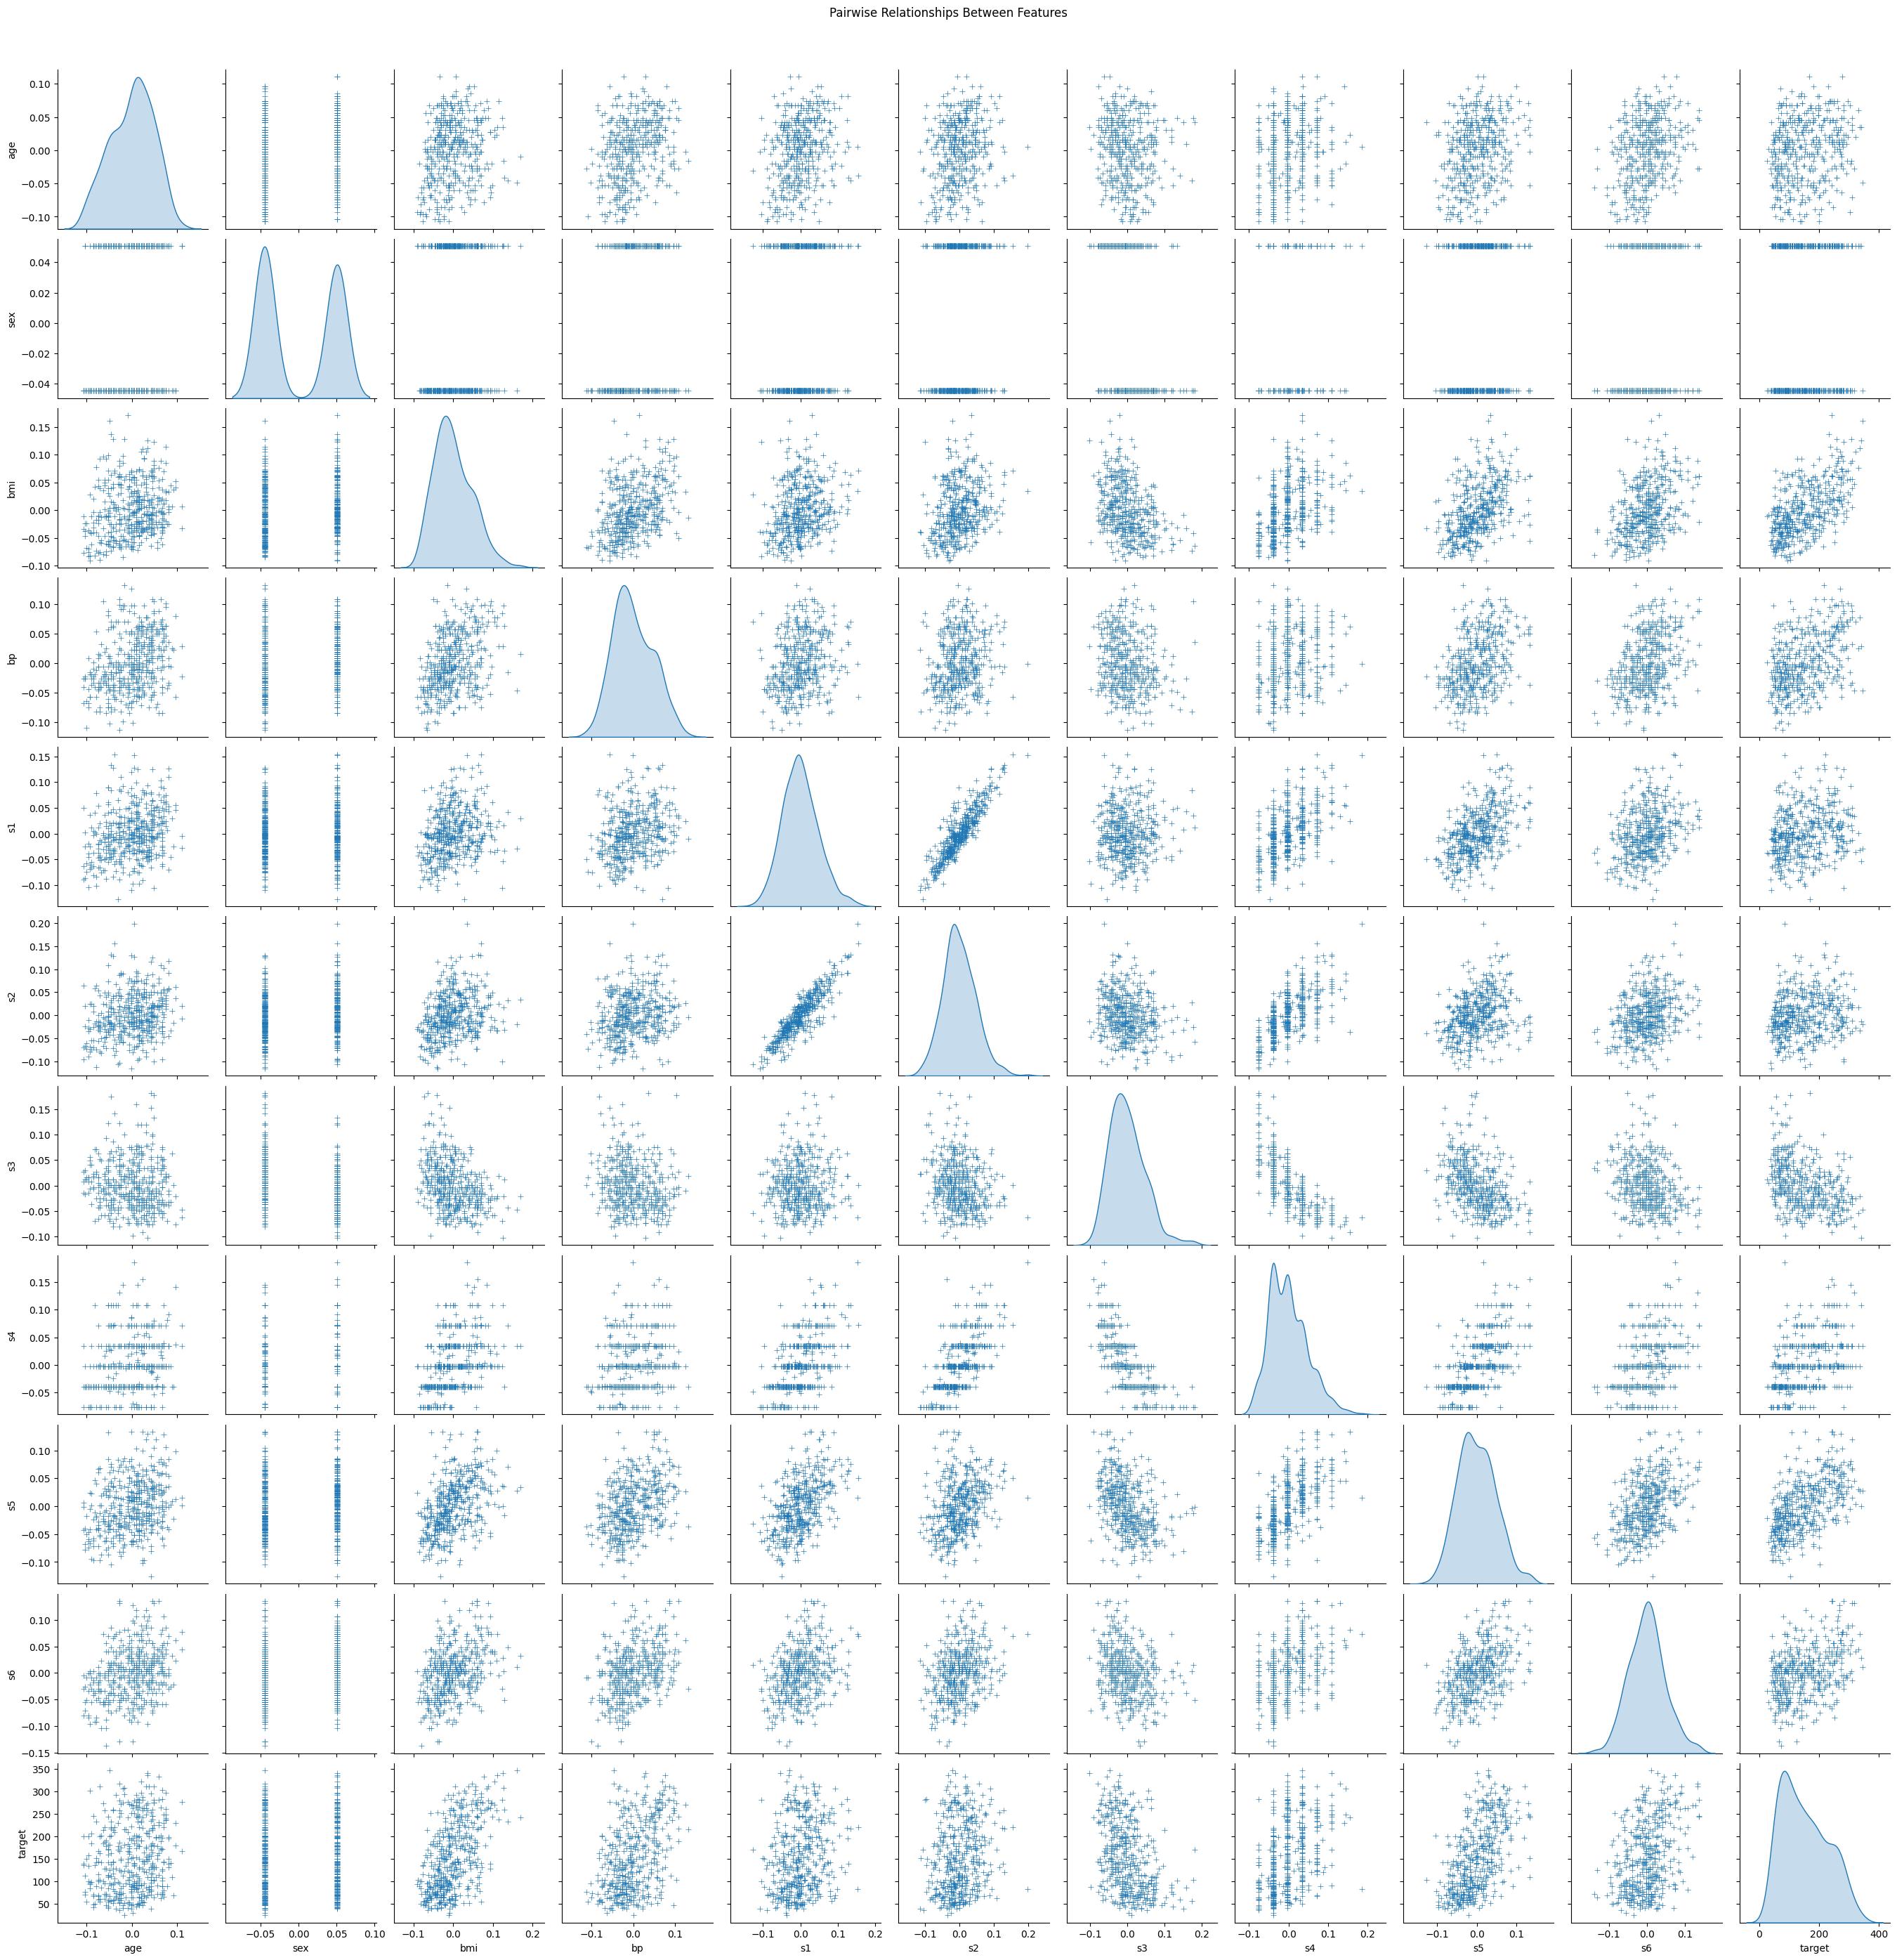

In [12]:
sns.pairplot(df, diag_kind='kde', markers='+')
plt.suptitle('Pairwise Relationships Between Features', y=1.02)#for knowing pairwise relationship
plt.show()

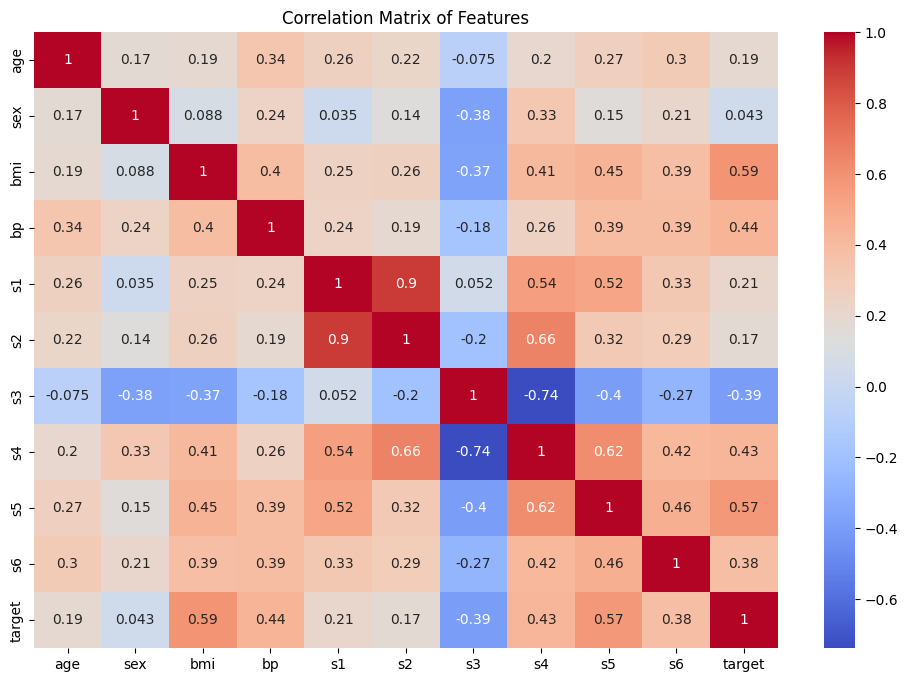

In [13]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  #correlation matrix, which helps identify strongly correlated features.
plt.title('Correlation Matrix of Features')
plt.show()

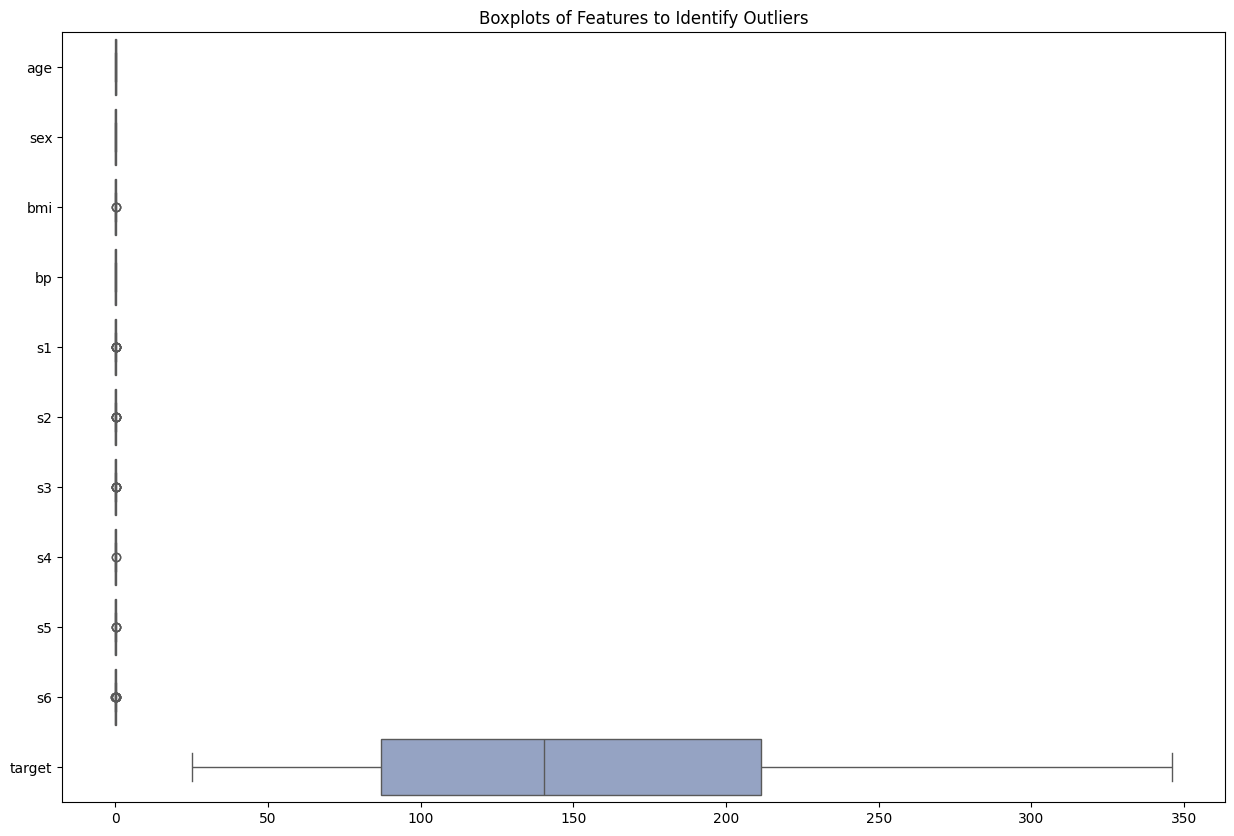

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Boxplots of Features to Identify Outliers')   #for identify outlayers
plt.show()

In [16]:
print(len(diabetes.feature_names))

10


In [23]:
features = df.drop(columns=['target'])  # Exclude the target column
target = df['target']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

# Create DataFrame with scaled features
data_scaled = pd.DataFrame(data_scaled, columns=diabetes.feature_names)

In [24]:
print(df.columns)  # Check the original columns in the data
print(data_scaled.shape)  # Confirm the shape of the scaled data

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')
(442, 10)


In [25]:
features = df.drop(columns=['target'])  # Remove the target column

In [26]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

In [27]:
data_scaled = pd.DataFrame(data_scaled, columns=diabetes.feature_names)

In [28]:
data_scaled.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


                                    2. Exploratory Data Analysis (EDA)

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


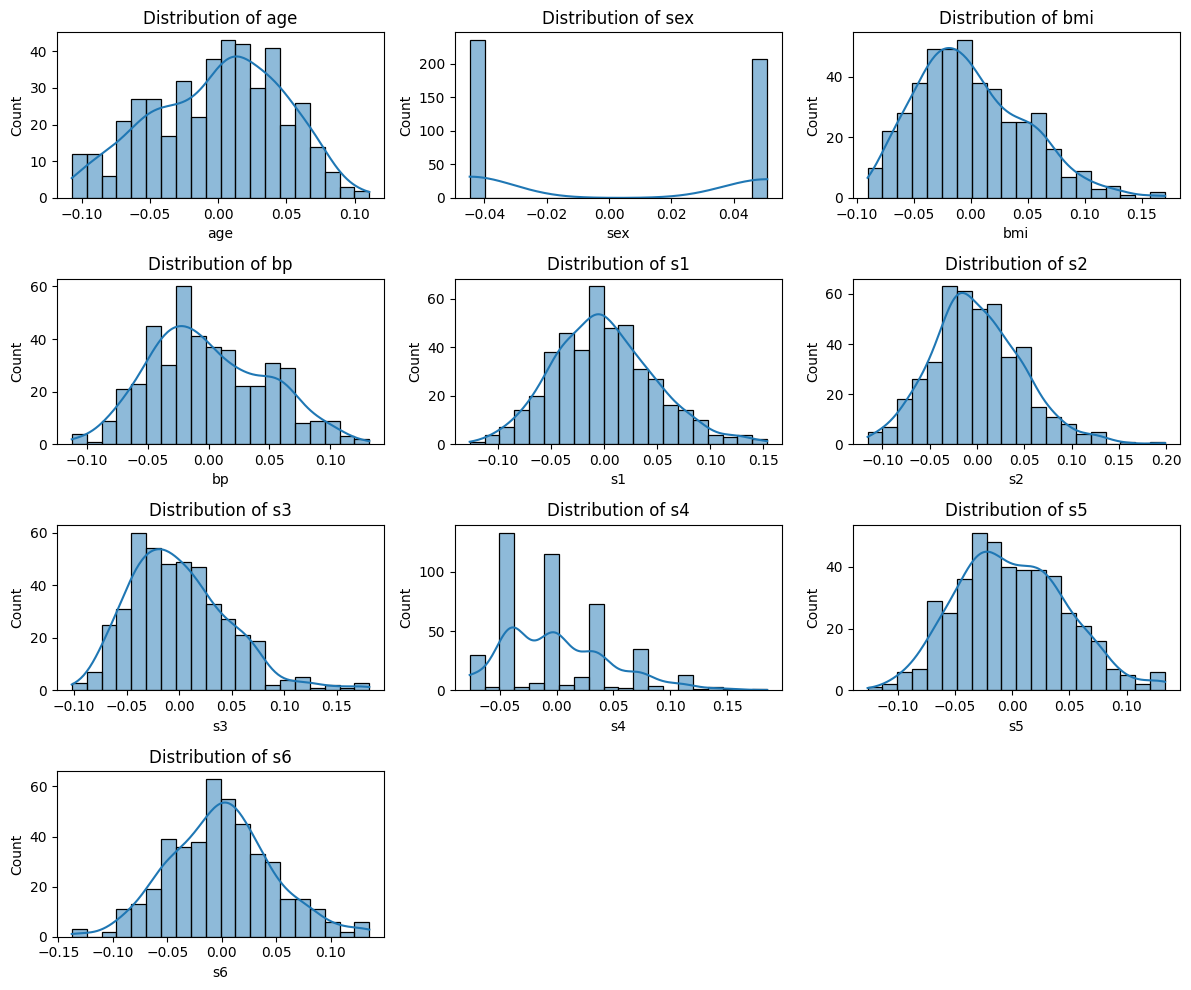

In [30]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[:-1]):  # Exclude the target column
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

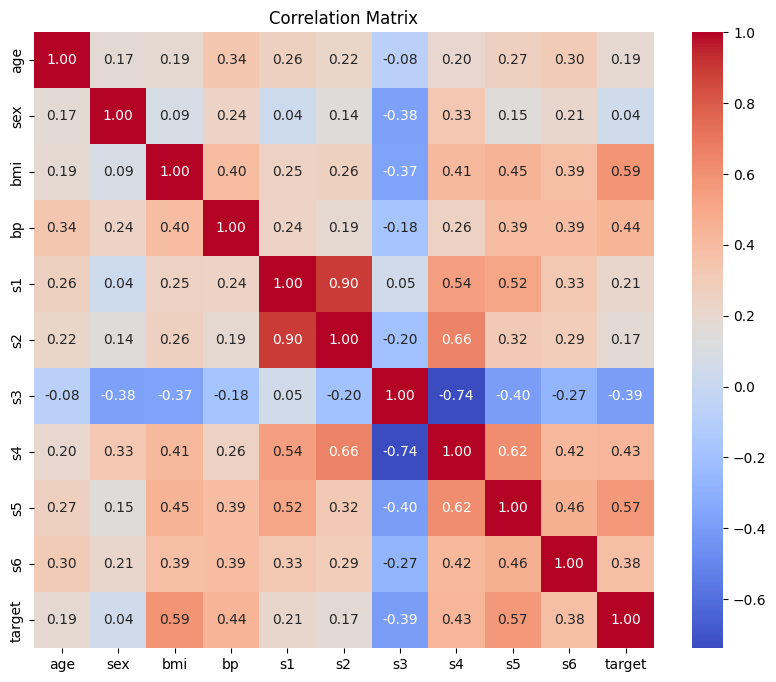

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


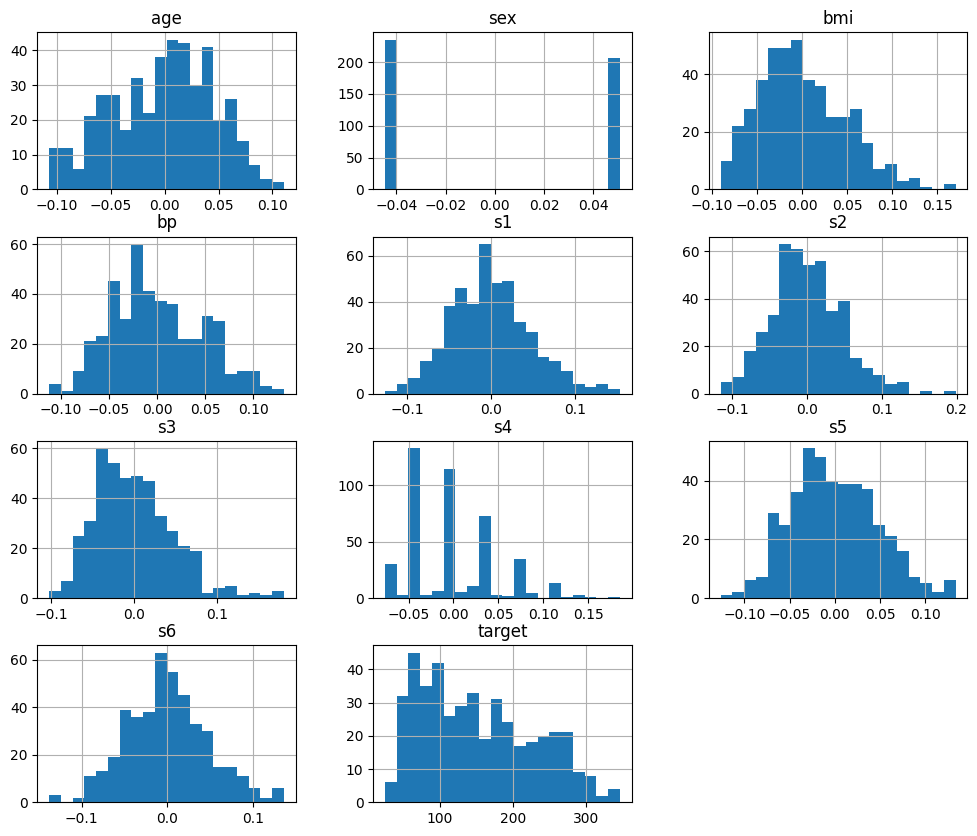

In [33]:
# Distribution of features
df.hist(bins=20, figsize=(12, 10))
plt.show()

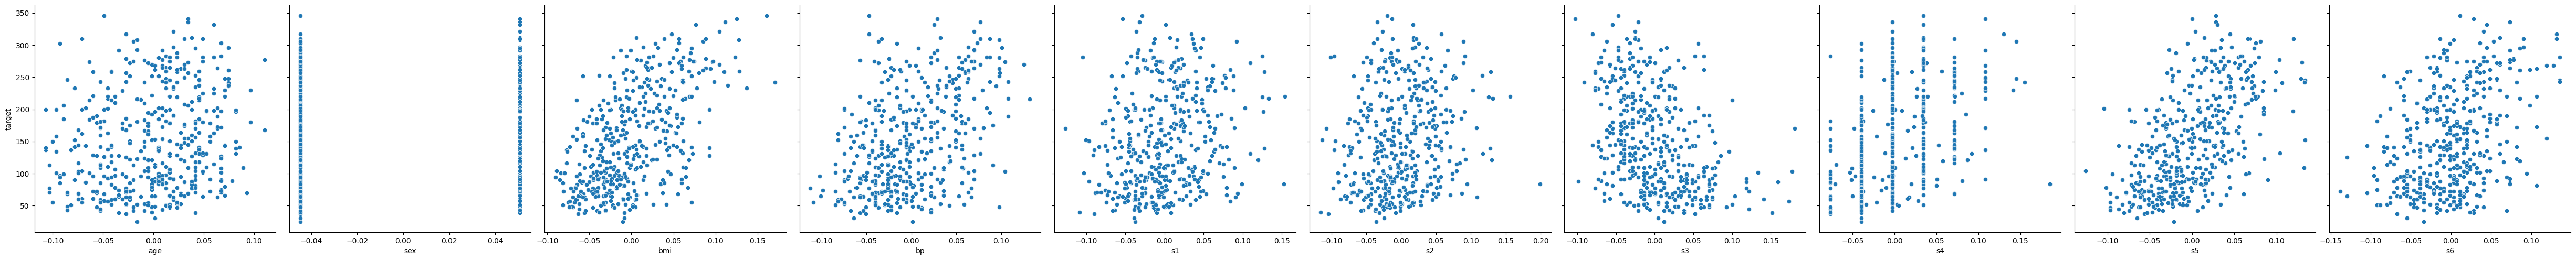

In [34]:
# Scatter plots
sns.pairplot(df, x_vars=diabetes.feature_names, y_vars='target', height=5)
plt.show()

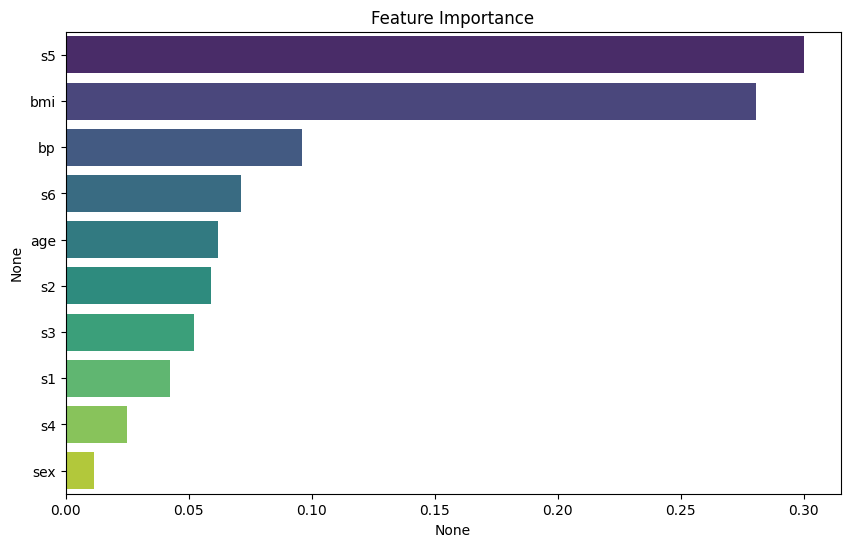

In [49]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(df.drop(columns=['target']), df['target'])
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=df.columns[:-1]).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.show()

                          3. Building the ANN Model (4 marks)

In [36]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [50]:
model = Sequential([
    Dense(64, input_dim=data_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [41]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

                                 4. Training the ANN Model 

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)

In [43]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 32265.8906 - mse: 32265.8906 - val_loss: 22111.4336 - val_mse: 22111.4336
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31373.8555 - mse: 31373.8555 - val_loss: 21931.5273 - val_mse: 21931.5273
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 32015.7188 - mse: 32015.7188 - val_loss: 21705.4902 - val_mse: 21705.4922
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30834.7246 - mse: 30834.7246 - val_loss: 21418.0449 - val_mse: 21418.0449
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 28994.2246 - mse: 28994.2246 - val_loss: 21047.9863 - val_mse: 21047.9863
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27463.3906 - mse: 27463.3906 - val_loss: 20583.1152 - val_mse: 20583.1152
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27831.2852 - mse: 27831.2852 - val_loss: 19993.6855 - val_mse: 19993.6855
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27016.9238 - mse: 

                                 5. Evaluating the Model 

In [44]:
loss, mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 2948.730712890625


In [45]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² Score on Test Set: {r2}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
R² Score on Test Set: 0.4434416240137605


In [51]:
model = Sequential([
    Dense(128, input_dim=data_scaled.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 30908.0703 - mse: 30908.0703 - val_loss: 22219.0273 - val_mse: 22219.0273
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31882.1758 - mse: 31882.1758 - val_loss: 21844.9980 - val_mse: 21844.9980
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31025.8281 - mse: 31025.8281 - val_loss: 21162.5000 - val_mse: 21162.5000
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27225.6426 - mse: 27225.6426 - val_loss: 19980.7227 - val_mse: 19980.7227
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 28299.1406 - mse: 28299.1406 - val_loss: 18032.7227 - val_mse: 18032.7227
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 28706.4414 - mse: 28706.4414 - val_loss: 15146.2275 - val_mse: 15146.2275
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21448.6113 - mse: 21448.6113 - val_loss: 11383.2363 - val_mse: 11383.2363
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16285.5176 - mse: 